# Keras: CV using deep Convolutional Neural Networks

**Content**:
- CNN for CIFAR10 dataset

**Note**: This is to run on colab



In [1]:
# load image
!wget https://www.dropbox.com/s/7ele0tav6zugyvg/image_for_learing_keras_3.jpg?dl=0 -O /content/sample_data/image_for_learing_keras_3.jpg

--2024-02-03 18:57:19--  https://www.dropbox.com/s/7ele0tav6zugyvg/image_for_learing_keras_3.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7ele0tav6zugyvg/image_for_learing_keras_3.jpg [following]
--2024-02-03 18:57:20--  https://www.dropbox.com/s/raw/7ele0tav6zugyvg/image_for_learing_keras_3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9131ffe5464a1f1b8dec182071.dl.dropboxusercontent.com/cd/0/inline/CMmeBzwHNu_f0TZXGRUV0-H3TnLSeOuMfep2L36gAe6nvELJURCKWnNM1cAVUJYwzlHu74TU33Ag8lcpR9o5OI7NhB_ugnc1jVJzYga6KydhLjczY0nAqDmtw1KgiY7FVFHKFohlQepgHaiuFpW1n0fS/file# [following]
--2024-02-03 18:57:20--  https://uc9131ffe5464a1f1b8dec182071.dl.dropboxusercontent.com/cd/0/inline/CMmeBzwHNu_f0TZXGRUV0-H3TnLSeOuMfep2L36gAe6nvE

## 2. Convolutional Neural Network

Convolutional Neural Networks are a form of Feedforward Neural Networks.

Given below is a schema of a typical CNN.

The first part consists of Convolutional and max-pooling layers which act as the feature extractor.

The second part consists of the fully connected layer which performs non-linear transformations of the extracted features and acts as the classifier.


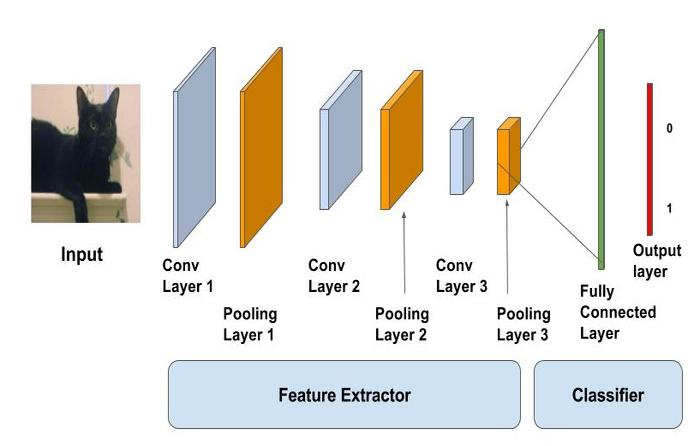

In [2]:
from IPython.display import Image
Image('/content/sample_data/image_for_learing_keras_3.jpg')

## Convolutional Layer

Convolution is a operation on k x k sized chunk which results the sum of the multiplied values in this chunk element-by-element to the values of convolution filter (also sized k x k)

**K** is termed as the kernel size.

An example of convolution operation on a matrix of size 5×5 with a kernel of size 3×3 is shown below

In [3]:
Image(url='https://learnopencv.com/wp-content/uploads/2017/11/convolution-example-matrix.gif')

Suppose, the input image is of size 32x32x3. This is nothing but a 3D array of depth 3.

Any convolution filter we define at this layer **must have a depth equal to the depth of the input**. So we can choose convolution filters of depth 3 ( e.g. 3x3x3 or 5x5x3 or 7x7x3 etc.).
Let’s pick a convolution filter of size 3x3x3. So, referring to the above example, here the convolutional kernel will be a cube instead of a square.

--2024-02-03 18:57:20--  https://www.dropbox.com/s/50l3vz1cxb0icvj/convolution.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/50l3vz1cxb0icvj/convolution.jpeg [following]
--2024-02-03 18:57:20--  https://www.dropbox.com/s/raw/50l3vz1cxb0icvj/convolution.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc7abaa684ee7178c828d15a393.dl.dropboxusercontent.com/cd/0/inline/CMnJUV9eaIIQWwUY0anXJ9jUC97xz5HTSiQW7K7abnP7Aenqmyg_GCCDQXO-ni6BS6cMCLYPjFjSdm6Zn5txOH7BrdVeg63M_Kqb42-4Dvgd1kLbHkgxpwdMxjJYFa08nxsHFmB6dxt-ibF1CVp9n_fC/file# [following]
--2024-02-03 18:57:21--  https://ucc7abaa684ee7178c828d15a393.dl.dropboxusercontent.com/cd/0/inline/CMnJUV9eaIIQWwUY0anXJ9jUC97xz5HTSiQW7K7abnP7Aenqmyg_GCCDQXO-ni6BS6cMCLYPjFjSdm6Zn5txO

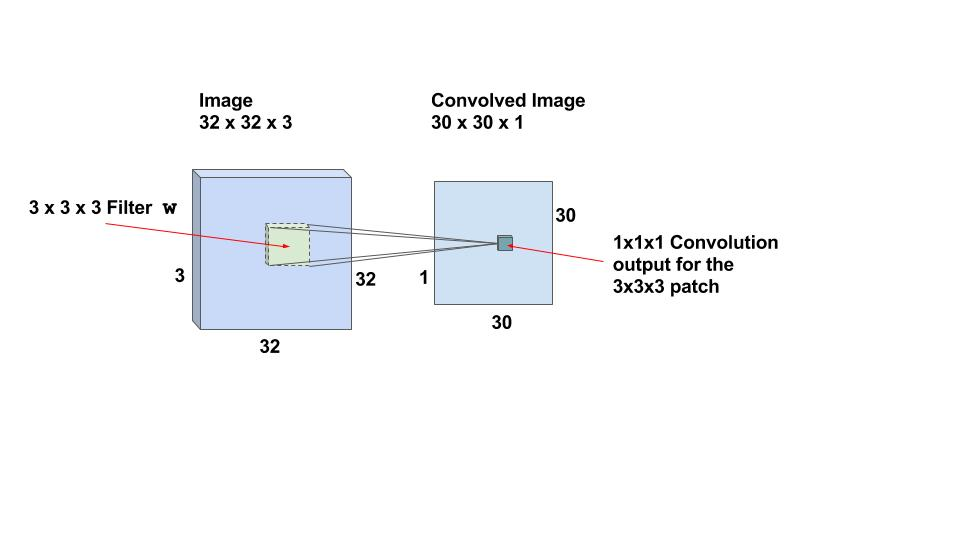

In [4]:
!wget https://www.dropbox.com/s/50l3vz1cxb0icvj/convolution.jpeg?dl=0 -O /content/sample_data/convolution.jpeg
Image('/content/sample_data/convolution.jpeg')


## Multiple Filters

Typically, more than 1 filter is used in one convolution layer.

In case of using 32 filters, an activation map becomes of size 30x30x32.

**Note**:  that all neurons associated with the same filter share the same weights and biases. So the number of weights while using 32 filters is simply 3x3x3x32 = 288 and the number of biases is 32.

--2024-02-03 18:57:22--  https://www.dropbox.com/s/pxaod1j75amtmrp/convolution2.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pxaod1j75amtmrp/convolution2.jpeg [following]
--2024-02-03 18:57:22--  https://www.dropbox.com/s/raw/pxaod1j75amtmrp/convolution2.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbcecdeb4815c20a3de5d9ad012.dl.dropboxusercontent.com/cd/0/inline/CMkEBxjsSBtCnSTQnr4N4EKhjV-GYkCCCnAIZC_kWGqZ3Ni1BRRsIInQVrPbAJH9i-Nuw0NvDJAT9uLanI6uI7rDO7zIZtXbVrwukc-UJPftQDvIT-_BfQ9BlLAcitE6Js9Lval56DAbmvP1ah0IGiuG/file# [following]
--2024-02-03 18:57:22--  https://ucbcecdeb4815c20a3de5d9ad012.dl.dropboxusercontent.com/cd/0/inline/CMkEBxjsSBtCnSTQnr4N4EKhjV-GYkCCCnAIZC_kWGqZ3Ni1BRRsIInQVrPbAJH9i-Nuw0NvDJAT9uLanI

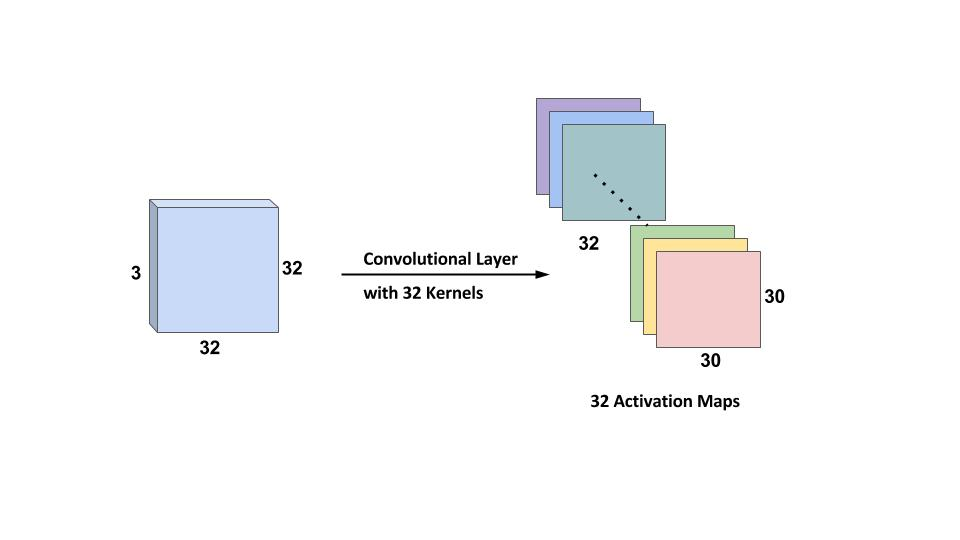

In [5]:
!wget https://www.dropbox.com/s/pxaod1j75amtmrp/convolution2.jpeg?dl=0 -O /content/sample_data/convolution2.jpeg
Image('/content/sample_data/convolution2.jpeg')


 ## Stride
In the above case, the window is moved by 1 pixel at a time.
However it also can slide by more than 1 pixel.

This number is called the **stride**

## Zero padding

After each convolution, the output reduces in size (as in this case we are going from 32×32 to 30×30).

For convenience, it’s a standard practice to pad zeros to the boundary of the input layer such that the output is the same size as input layer.

So, in this example, if we add a padding of size 1 on both sides of the input layer, the size of the output layer will be 32x32x32 which makes implementation simpler as well.

Let’s say you have an input of size NxN, a filter of size F and you are using stride S and a zero padding of size P is added to the input image. Then, the output will be of size MxM where,

$$M = \frac{N-F+2P}{S} + 1$$

## Max Pooling Layer

Pooling layer is mostly used immediately after the convolutional layer to **reduce the spatial size** (only width and height, not depth).

The most common form of pooling is **Max pooling** where filter of size p is  applied the to compute the maximum over the sized part of the image.

Max pool layer with filter size 2×2 and stride 2 is shown below. The output is the max value in a 2×2 region shown using encircled digits.

The most common pooling operation is done with the filter of size 2×2 with a stride of 2. It essentially reduces the size of input by half.


--2024-02-03 18:57:23--  https://www.dropbox.com/s/88vlnxg2gy8b6z7/max-pooling-demo.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/88vlnxg2gy8b6z7/max-pooling-demo.jpeg [following]
--2024-02-03 18:57:23--  https://www.dropbox.com/s/raw/88vlnxg2gy8b6z7/max-pooling-demo.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec96af116ada94070e9a4dac53.dl.dropboxusercontent.com/cd/0/inline/CMk8e5oaPw6Mvx7fiZ_7AWsC45vpe6A5QhIxJ-mOL4YKQ_ge8a6xJ66QMvlOQmcPAwFb_6ML9jXGvhgIGuZzRsW6-ASzhEeveYCs1hL-4ZTwjxSNmmIs0sbjRvsFdXZcG0ogwzpl46AbNH21CXAEoyAS/file# [following]
--2024-02-03 18:57:23--  https://ucec96af116ada94070e9a4dac53.dl.dropboxusercontent.com/cd/0/inline/CMk8e5oaPw6Mvx7fiZ_7AWsC45vpe6A5QhIxJ-mOL4YKQ_ge8a6xJ66QMvlOQmcPAwFb_6

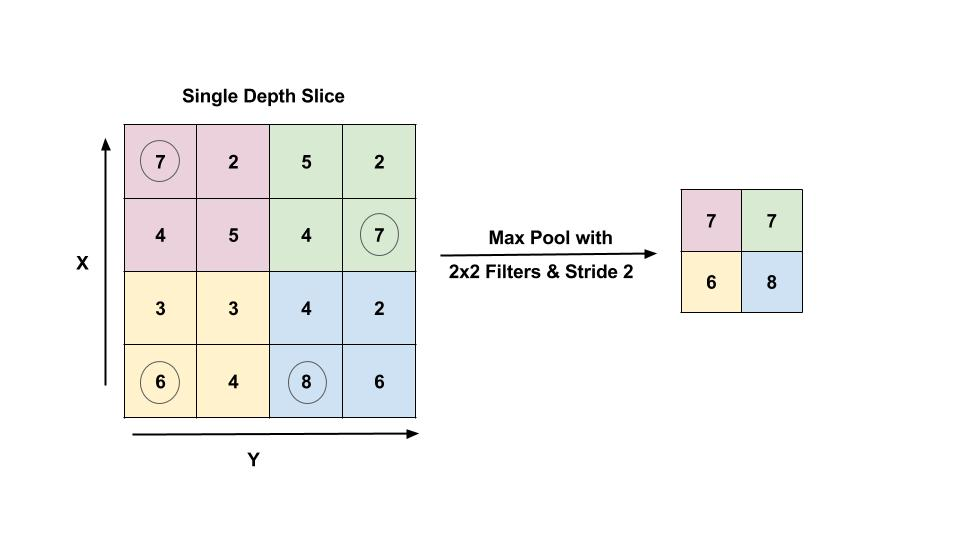

In [6]:
!wget https://www.dropbox.com/s/88vlnxg2gy8b6z7/max-pooling-demo.jpeg?dl=0 -O /content/sample_data/max-pooling-demo.jpeg
Image('/content/sample_data/max-pooling-demo.jpeg')


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## 3.1. The Dataset – CIFAR10
The CIFAR10 dataset comes bundled with Keras. It has 50,000 training images and 10,000 test images. There are 10 classes like airplanes, automobiles, birds, cats, deer, dog, frog, horse, ship and truck. The images are of size 32×32. Given below are a few examples.



--2024-02-03 18:57:32--  https://www.dropbox.com/s/ufwl95bvn0frpui/image_for_learing_keras_4.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ufwl95bvn0frpui/image_for_learing_keras_4.png [following]
--2024-02-03 18:57:32--  https://www.dropbox.com/s/raw/ufwl95bvn0frpui/image_for_learing_keras_4.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49bdd0c1a004ac4ebced1aa4b3.dl.dropboxusercontent.com/cd/0/inline/CMmc0PB_XrpJ1Rz-a0a1MchjfgDzBRmlPMoI1IWn_7VUPDt2vBAEPPEJtRmlNooNef2rx3WMk3bRoWwq_lpRaVsKdqoQe4ikeq-7xn6VnaE9QGXeFZwDL5aVdZeBh5ZX0FmBK08OjGGXTKWt39kyKZeF/file# [following]
--2024-02-03 18:57:32--  https://uc49bdd0c1a004ac4ebced1aa4b3.dl.dropboxusercontent.com/cd/0/inline/CMmc0PB_XrpJ1Rz-a0a1MchjfgDzBRmlPMoI1IWn_7VUPD

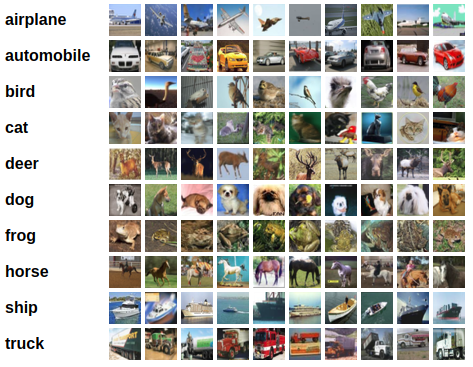

In [8]:
!wget https://www.dropbox.com/s/ufwl95bvn0frpui/image_for_learing_keras_4.png?dl=0 -O /content/sample_data/image_for_learing_keras_4.png
Image('/content/sample_data/image_for_learing_keras_4.png', width=800, height=600)


## Import the Data
The CIFAR10 dataset comes bundled with Keras. We will use the load_data function to load it into memory

In [9]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Explore the Data
Check out the number of images in training and test data and also the number of classes and some sample images

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

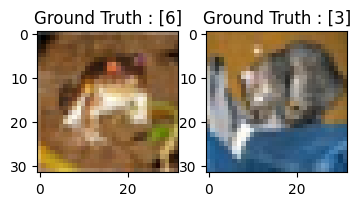

In [10]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


## Preprocess the Data
Perform normalization of data and convert the labels to categorical variables to be used in Keras

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]

# note sure what are the following two rows  checked (train_data == train_images).any()=> True
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
# Display the change for category label using one-hot encoding
print('Original label of sample 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##  3.2. The Network
To implement a CNN, stack up Convolutional Layers, followed by Max Pooling layers, and include Dropout to avoid overfitting.

Finally, add a fully connected ( Dense ) layer followed by a softmax layer.


In [14]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model


model= createModel()

In the above code, we use **6 convolutional layers and 1 fully-connected layer**.

We add convolutional layers with 32 filters(kernels) with a window size of 3×3.

Similarly, we add a conv layer with 64 filters.

We add a max pooling layers with window size 2×2.

We add a dropout layer with a dropout ratio of 0.25 (menas .25 will be set to 0 and .75  will be kept).

In the final lines, we add the dense layer which performs the classification among 10 classes using a softmax layer.

If we check the model summary we can see the shapes of each layer.

In [26]:
# 9 size of filter *3 channels * 32 filters +32 bias = 27*32+32=28*32= (30-2)(30+2) = 900-4 = 896
# 9 size * 32 filters(channnels) *32 filters  + 32 bias  = 9248



896

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

Due to padding in the first layer, the output shape is same as the input ( 32×32 ).

The second conv layer shrinks by 2 pixels in both dimensions.
Also, the output size after pooling layer decreases by half due to stride of 2 and a window size of 2×2.

The final droupout layer has an output of 2x2x64.

This has to be converted to a single array. This is done by the flatten layer which converts the 3D array into a 1D array of size 2x2x64 = 256.

The final layer has 10 nodes since there are 10 classes.



## 3.3. Training the network

**Note:** Change runtime to None since it causes error on GPU:

`UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above`

## Testing for GPU
You can easily check if the GPU is enabled by executing the following code

If the GPU is **enabled**, it will give the following output
`/device:GPU:0`

In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Check devices
try the following code to review the devices used during the execution of notebook in the cloud

It should show the output as follows:
```
[name: "/device:CPU:0"
   device_type: "CPU"
   memory_limit: 268435456
   locality { }
   incarnation: 1734904979049303143, name: "/device:XLA_CPU:0"
   device_type: "XLA_CPU" memory_limit: 17179869184
   locality { }
   incarnation: 16069148927281628039
   physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
   device_type: "XLA_GPU"
   memory_limit: 17179869184
   locality { }
   incarnation: 16623465188569787091
   physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
   device_type: "GPU"
   memory_limit: 14062547764
   locality {
      bus_id: 1
      links { }
   }
   incarnation: 6674128802944374158
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]
```


In [17]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2784869256255966005
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7679383797695387349
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [18]:
model1 = createModel()
batch_size = 256
epochs = 50 # it is quite slow about 4-5mins for epoch - better to set more than 50  240203: now it is faster - about 4 s)

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

[0.6253042221069336, 0.7979999780654907]

## Output of the training after 50 epochs

```
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 228s 1s/step - loss: 2.0713 - accuracy: 0.2316 - val_loss: 1.7484 - val_accuracy: 0.3703
Epoch 2/50
196/196 [==============================] - 228s 1s/step - loss: 1.7226 - accuracy: 0.3715 - val_loss: 1.6000 - val_accuracy: 0.4301
Epoch 3/50
196/196 [==============================] - 226s 1s/step - loss: 1.5241 - accuracy: 0.4457 - val_loss: 1.4334 - val_accuracy: 0.4861

...

Epoch 48/50
196/196 [==============================] - 223s 1s/step - loss: 0.4946 - accuracy: 0.8311 - val_loss: 0.6654 - val_accuracy: 0.7860
Epoch 49/50
196/196 [==============================] - 221s 1s/step - loss: 0.4945 - accuracy: 0.8298 - val_loss: 0.6447 - val_accuracy: 0.7971
Epoch 50/50
196/196 [==============================] - 221s 1s/step - loss: 0.4868 - accuracy: 0.8306 - val_loss: 0.7318 - val_accuracy: 0.7803
313/313 [==============================] - 11s 36ms/step - loss: 0.7318 - accuracy: 0.7803
[0.7317519783973694, 0.7803000211715698]
```


## 3.4. Loss & Accuracy Curves

Text(0.5, 1.0, 'Loss Curves')

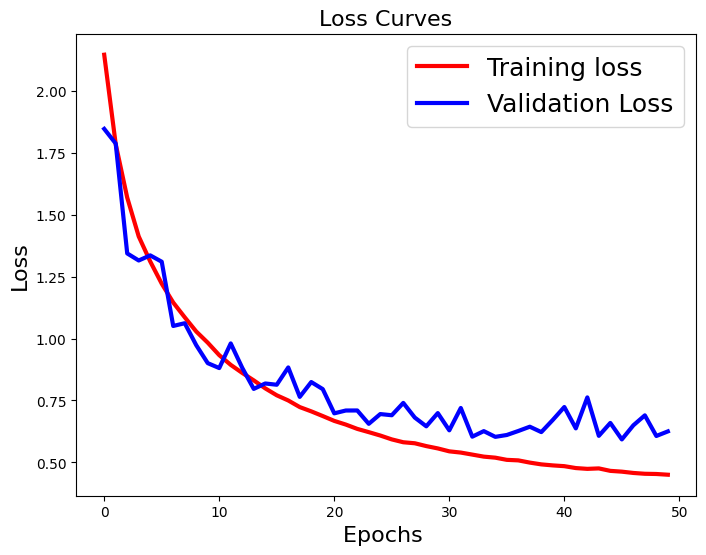

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

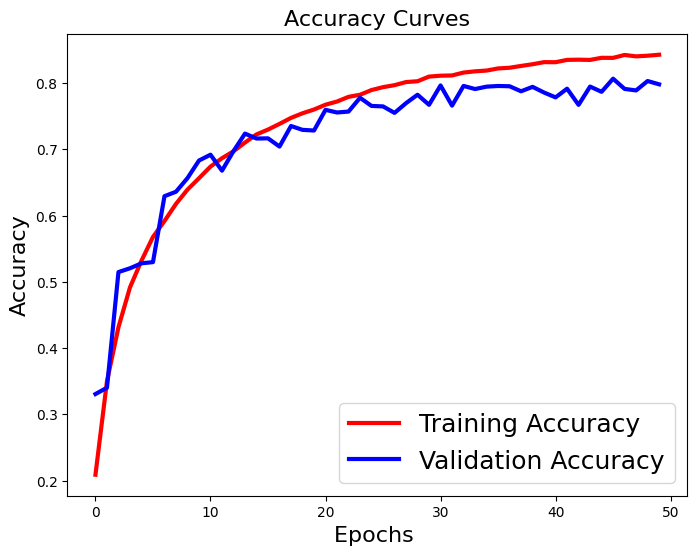

In [20]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In another training session the curves look like on the image bellow.
Here we can see that there is a considerable **difference between the training and validation loss**. This is the **sign of Overfitting**. But we have already used **Dropout** in the network, thus we may try using **Data augmentation** to reduce overfitting


--2024-02-03 19:02:10--  https://www.dropbox.com/s/ejrwnz27t9rvsvu/training_original_results.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ejrwnz27t9rvsvu/training_original_results.png [following]
--2024-02-03 19:02:10--  https://www.dropbox.com/s/raw/ejrwnz27t9rvsvu/training_original_results.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdebf996b2f669f5ca8f1ced2c1.dl.dropboxusercontent.com/cd/0/inline/CMmqoDVuMQsMAQW9Q6uJq3hjXdoDscjfbzd5Uup-3Q3yLy2YTapWHgvwoKTl3Feb8YpkpfSMHN0fUhvbvhe1p-Vg3Oa6q8zxmnJf0igkQFbObeup3K-G7yXOgJE5HFclh9mrOlwGVcg9qezcguxQehQJ/file# [following]
--2024-02-03 19:02:10--  https://ucdebf996b2f669f5ca8f1ced2c1.dl.dropboxusercontent.com/cd/0/inline/CMmqoDVuMQsMAQW9Q6uJq3hjXdoDscjfbzd5Uup-3Q3yLy

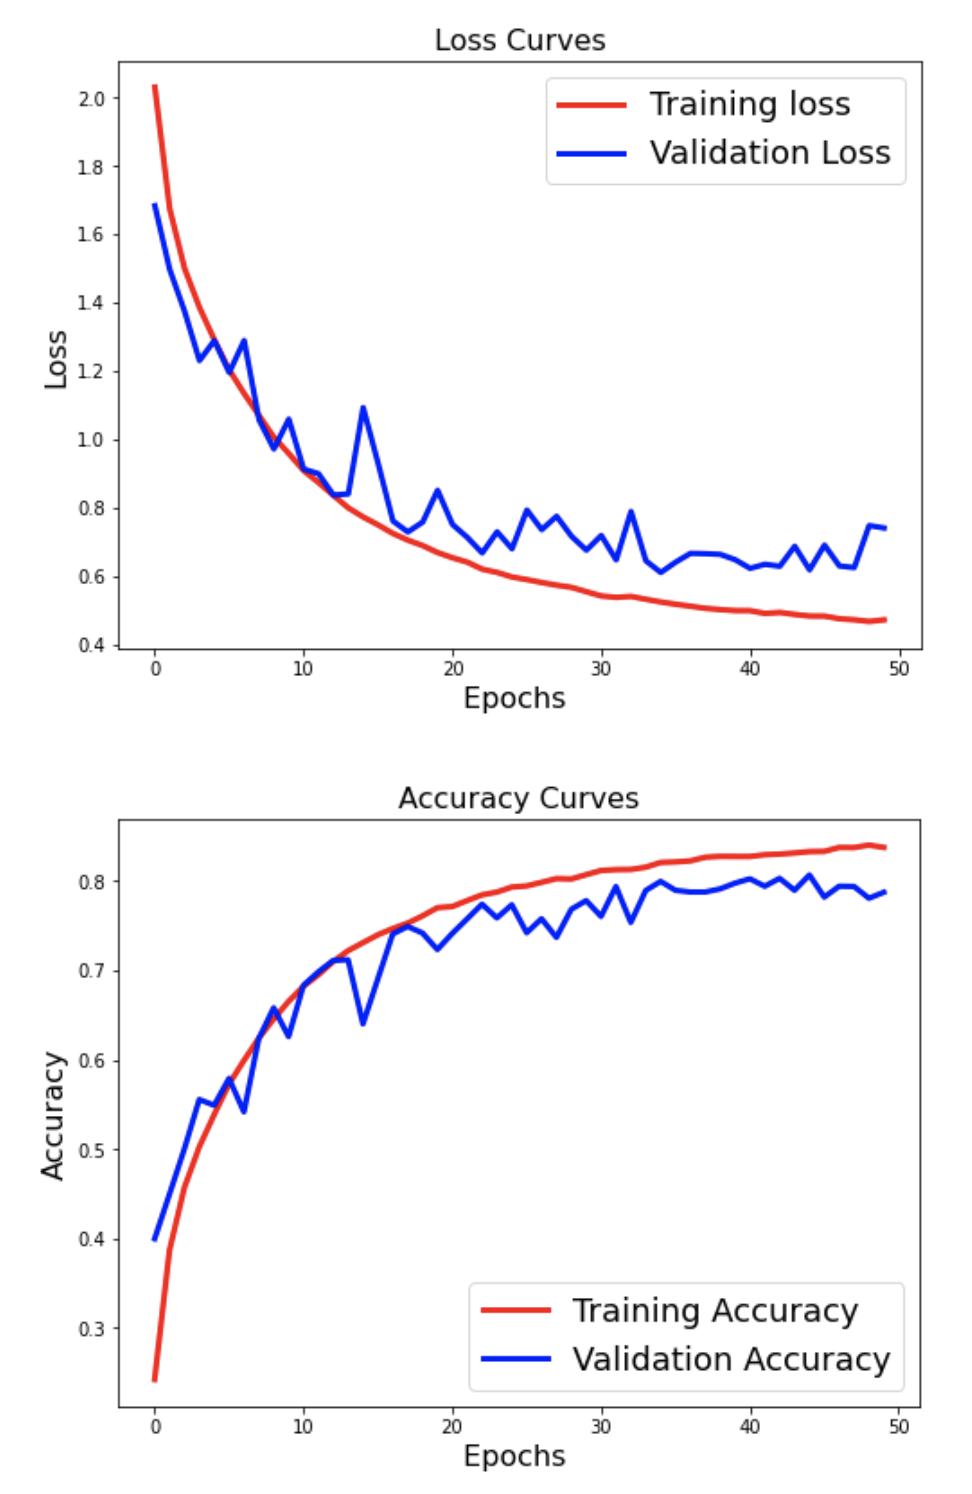

In [21]:
!wget https://www.dropbox.com/s/ejrwnz27t9rvsvu/training_original_results.png?dl=0 -O /content/sample_data/training_original_results.png
Image('/content/sample_data/training_original_results.png', width=600, height=1000)


## 4. Using Data Augmentation

One of the major reasons for overfitting is that you don’t have enough data to train your network.

Apart from regularization, another very effective way to counter Overfitting is Data Augmentation.

It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image.

It can be a tedious task but fortunately, this can be done in Keras using the **ImageDataGenerator** instance

Here we use the ImageDataGenerator class in Keras to perform Data Augmentation.

``` python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1.,
    horizontal_flip=True,
    vertical_flip=True)

```

This may include  rotation of the image, shifting the image left/right/top/bottom by some amount, flip the image horizontally or vertically, shear or zoom the image etc. Some generated images are shown below.

--2024-02-03 19:02:11--  https://www.dropbox.com/s/yzhqyzyzkh8ecbi/data-aug.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yzhqyzyzkh8ecbi/data-aug.png [following]
--2024-02-03 19:02:11--  https://www.dropbox.com/s/raw/yzhqyzyzkh8ecbi/data-aug.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12aa28c6a32cc9d2b46d28d1db.dl.dropboxusercontent.com/cd/0/inline/CMmXHYST6c58uBBVLU6Kaj5bsRaRnwbpUi2zTa5tZhQf33QBqkBeT4aSpyD-3cfMY7WzQ4ZR1BVHVDKtvwetzg_m-T81roEPRC5UPsgS8hiOwAfhzzUqeOnYVcieKZB9KsfLngP0-s404ye-3LDLj-hJ/file# [following]
--2024-02-03 19:02:11--  https://uc12aa28c6a32cc9d2b46d28d1db.dl.dropboxusercontent.com/cd/0/inline/CMmXHYST6c58uBBVLU6Kaj5bsRaRnwbpUi2zTa5tZhQf33QBqkBeT4aSpyD-3cfMY7WzQ4ZR1BVHVDKtvwetzg_m-T81roEPR

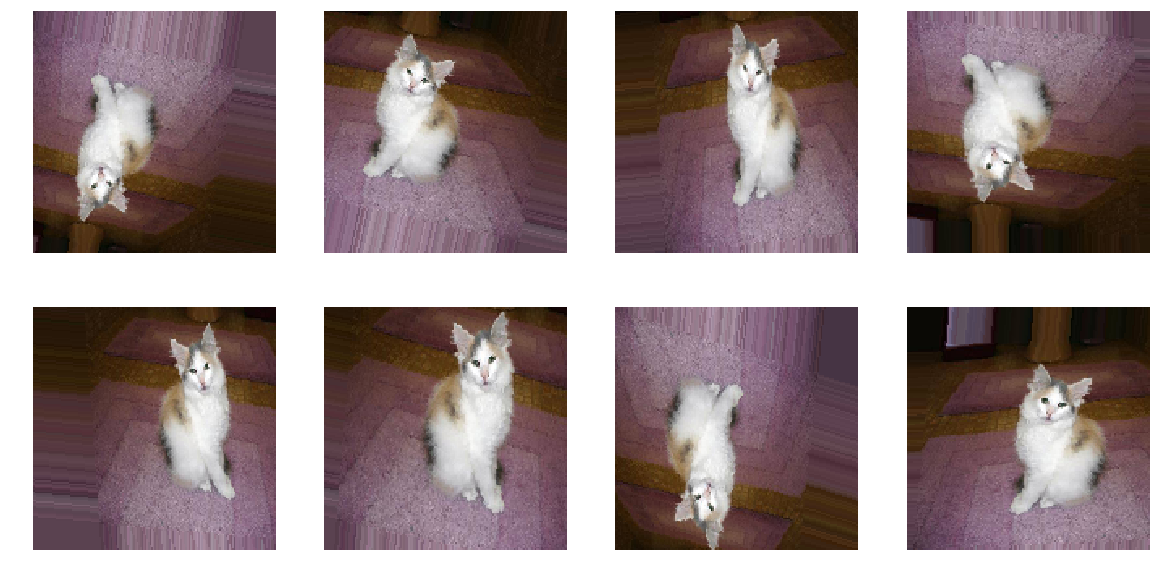

In [22]:
!wget https://www.dropbox.com/s/yzhqyzyzkh8ecbi/data-aug.png?dl=0 -O /content/sample_data/data-aug.png
Image('/content/sample_data/data-aug.png', width=800, height=400)


In [23]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 50
datagen = ImageDataGenerator(
#     these were commented in provided source code but exist in code of lesson
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)

        zoom_range=0.1, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        shear_range=0.)  # ??? from site


# datagen.fit(train_data) # was commented

epochs= 50
# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/50


<ipython-input-23-47a5e6313d54>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),


196/196 [==============================] - 46s 223ms/step - loss: 2.1436 - accuracy: 0.1943 - val_loss: 1.9762 - val_accuracy: 0.2495
Epoch 2/50
196/196 [==============================] - 37s 187ms/step - loss: 1.8595 - accuracy: 0.3136 - val_loss: 1.6096 - val_accuracy: 0.4172
Epoch 3/50
196/196 [==============================] - 39s 195ms/step - loss: 1.6705 - accuracy: 0.3894 - val_loss: 1.4174 - val_accuracy: 0.4739
Epoch 4/50
196/196 [==============================] - 39s 192ms/step - loss: 1.5482 - accuracy: 0.4370 - val_loss: 1.3464 - val_accuracy: 0.5094
Epoch 5/50
196/196 [==============================] - 40s 199ms/step - loss: 1.4464 - accuracy: 0.4775 - val_loss: 1.2168 - val_accuracy: 0.5577
Epoch 6/50
196/196 [==============================] - 39s 195ms/step - loss: 1.3639 - accuracy: 0.5088 - val_loss: 1.1972 - val_accuracy: 0.5712
Epoch 7/50
196/196 [==============================] - 42s 210ms/step - loss: 1.3049 - accuracy: 0.5316 - val_loss: 1.1706 - val_accuracy: 0.5

[0.6818959712982178, 0.7799999713897705]

In the above code,

We first create the model and configure it.

Then we create an ImageDataGenerator object and configure it using parameters for horizontal flip, and image translation.

The datagen.flow() function generates batches of data, after performing the data transformations / augmentation specified during the instantiation of the data generator.

The fit_generator function will train the model using the data obtained in batches from the datagen.flow function.


Text(0.5, 1.0, 'Loss Curves')

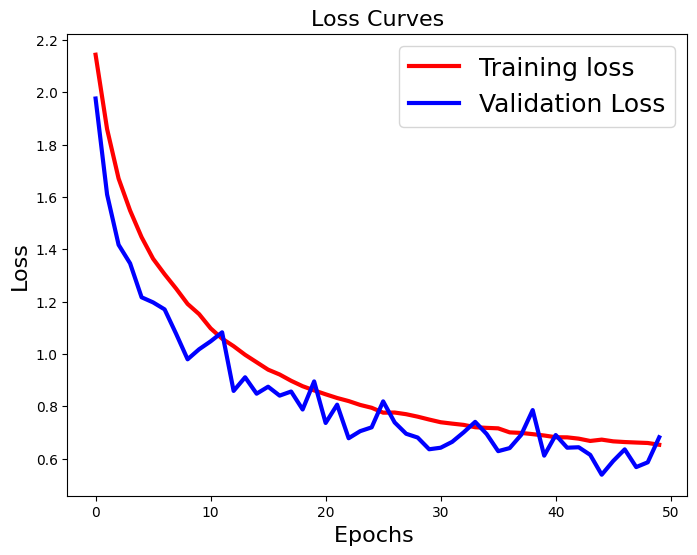

In [24]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

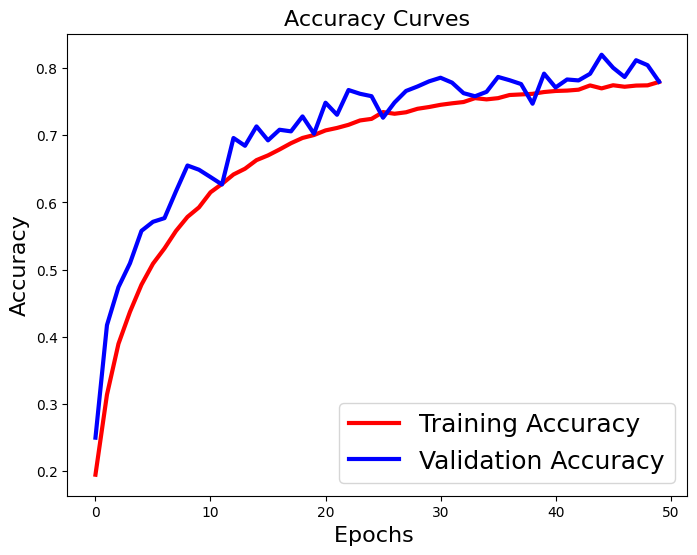

In [25]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The test accuracy is greater than training accuracy. This is not the usual case but this means that the model has generalized very well.